In [3]:
#(a)

In [3]:
import json 
import numpy as np
import matplotlib.pyplot as plt 
import re
import math 
import string
from sklearn.cluster import KMeans 

In [4]:
f = open('./speeches.json', 'rb') 
speeches = []
for line in f:
    speeches.append(json.loads(line))

In [5]:
# function that cleans and splits each SOU address

In [9]:
def clean_and_split(s):
    s = s.lower().replace("-", "").translate(str.maketrans('', '', string.punctuation))
    s = re.sub("(\r\n)+", " ", s)
    s = re.sub(" +", " ", s.strip())
    return s.split(" ")

In [ ]:
# create a dictionary of words in the entire document

In [10]:
word_dic = {}
for i in range(len(speeches)):
    txt = clean_and_split(speeches[i]['text'])
    for word in txt: 
        if word not in word_dic:
            word_dic[word] = 0
        word_dic[word] += 1     

In [18]:
words_lst = [] 
for key, value in word_dic.items():
    words_lst.append((key, value))

In [19]:
words_lst.sort(key = lambda x: x[1], reverse = True)
common = [] 
for x in words_lst[:20]:
    common.append(x[0])

In [20]:
common[:5]

['the', 'of', 'to', 'and', 'in']

In [22]:
few = []
for x in words_lst:
    if x[1] < 50:
        few.append(x[0])

In [50]:
few[:5]

['violate', 'withdraw', 'guided', 'terminate', 'launched']

In [51]:
def filter_words(words_lst):
    final = []
    for word in words_lst:
        if (word not in common) and (word not in few):
            final.append(word)
    return final 

In [43]:
lst = [x[0] for x in words_lst]
filtered_lst = filter_words(lst)
filtered_lst[:5]

['on', 'i', 'has', 'been', 'are']

In [ ]:
# derive list of dictionaries of words for each speech 

In [31]:
total_dic = []
for i in range(len(speeches)):
    dic = {}
    speech_lst = filter_words(clean_and_split(speeches[i]['text']))
    for word in speech_lst:
        if word not in dic:
            dic[word] = 0 
        dic[word] += 1 
    total_dic.append(dic)

In [ ]:
# create a function that computes TFIDF weights

In [52]:
def compute_weight(index, word):
    word_dic = total_dic[index]
    word_count = word_dic[word]
    sou = 0
    for dic in total_dic: 
        if word in dic: 
            sou += 1 
    return word_count * math.log( 226 / sou)

In [ ]:
# create a function that computes TFIDF vectors for each address

In [53]:
def compute_vector(index):
    word_dic = total_dic[index]
    vector = []
    for word in filtered_lst: 
        if word in word_dic:
            vector.append(compute_weight(index, word))
            continue
        vector.append(0)
    return vector 

In [54]:
vector_lst = []
for i in range(len(speeches)):
    vector_lst.append(compute_vector(i))

In [45]:
#(b)

In [ ]:
# create a function that computes the norm of TFIDF vector 

In [60]:
def compute_norm(vector):
    vector = np.array(vector)
    return np.linalg.norm(vector)

In [61]:
# create a function that calculates similarity measures of speeches 

In [62]:
def compute_similarity(index_1, index_2):
    v_1 = vector_lst[index_1]
    v_2 = vector_lst[index_2]
    return np.dot(v_1, v_2) / ((compute_norm(v_1) * compute_norm(v_2)))

In [ ]:
# compute similarities of all pairs of speeches 

In [64]:
similarity_lst = []
for index_1 in range(len(speeches)):
    for index_2 in range(len(speeches)):
        if index_1 <= index_2:
            continue 
        if speeches[index_1]['president'] == speeches[index_2]['president']:
            similarity_lst.append(([speeches[index_1]['year'], speeches[index_1]['president'], 
                                      speeches[index_2]['year'], speeches[index_2]['president']], 
                                      compute_similarity(index_1, index_2), True))
        else: 
            similarity_lst.append(([speeches[index_1]['year'], speeches[index_1]['president'], 
                                      speeches[index_2]['year'], speeches[index_2]['president']], 
                                      compute_similarity(index_1, index_2), False))           

In [65]:
similarity_lst.sort(key = lambda x: x[1], reverse = True)

In [53]:
# find 50 most similar pairs of SOU by different presidents

In [68]:
diff_president = [] 
for pair in similarity_lst:
    if pair[2] == False:
        diff_president.append(pair[0])
    if len(diff_president) == 50:
        break 

In [111]:
diff_president[:50]

[['1995', 'William J. Clinton', '2010', 'Barack Obama'],
 ['2011', 'Barack Obama', '1995', 'William J. Clinton'],
 ['2012', 'Barack Obama', '1995', 'William J. Clinton'],
 ['1846', 'James K. Polk', '1844', 'John Tyler'],
 ['1885', 'Grover Cleveland', '1889', 'Benjamin Harrison'],
 ['1992', 'George Bush', '1995', 'William J. Clinton'],
 ['1994', 'William J. Clinton', '2010', 'Barack Obama'],
 ['1993', 'William J. Clinton', '2009', 'Barack Obama'],
 ['1880', 'Rutherford B. Hayes', '1885', 'Grover Cleveland'],
 ['1885', 'Grover Cleveland', '1877', 'Rutherford B. Hayes'],
 ['1836', 'Andrew Jackson', '1839', 'Martin Van Buren'],
 ['1992', 'George Bush', '1994', 'William J. Clinton'],
 ['2011', 'Barack Obama', '1998', 'William J. Clinton'],
 ['1844', 'John Tyler', '1845', 'James K. Polk'],
 ['1993', 'William J. Clinton', '2011', 'Barack Obama'],
 ['2012', 'Barack Obama', '1994', 'William J. Clinton'],
 ['1880', 'Rutherford B. Hayes', '1889', 'Benjamin Harrison'],
 ['1989', 'George Bush', '19

In [70]:
# find 50 most similar pairs of SOU by same president 

In [74]:
same_president = []
for pair in similarity_lst:
    if pair[2] == True:
        same_president.append(pair[0])
    if len(same_president) == 50:
        break 

In [110]:
same_president[:50]

[['2012', 'Barack Obama', '2013', 'Barack Obama'],
 ['2008', 'George W. Bush', '2007', 'George W. Bush'],
 ['2012', 'Barack Obama', '2010', 'Barack Obama'],
 ['2011', 'Barack Obama', '2010', 'Barack Obama'],
 ['2012', 'Barack Obama', '2011', 'Barack Obama'],
 ['1997', 'William J. Clinton', '1998', 'William J. Clinton'],
 ['1999', 'William J. Clinton', '1998', 'William J. Clinton'],
 ['2000', 'William J. Clinton', '1998', 'William J. Clinton'],
 ['1997', 'William J. Clinton', '1999', 'William J. Clinton'],
 ['1899', 'William McKinley', '1900', 'William McKinley'],
 ['2009', 'Barack Obama', '2010', 'Barack Obama'],
 ['2005', 'George W. Bush', '2008', 'George W. Bush'],
 ['2000', 'William J. Clinton', '1999', 'William J. Clinton'],
 ['1967', 'Lyndon B. Johnson', '1966', 'Lyndon B. Johnson'],
 ['1994', 'William J. Clinton', '1995', 'William J. Clinton'],
 ['2004', 'George W. Bush', '2007', 'George W. Bush'],
 ['2005', 'George W. Bush', '2007', 'George W. Bush'],
 ['1834', 'Andrew Jackson',

In [59]:
# 25 most similar pairs of Presidents, 
# averaging the cosine similarity over all pairs of their SOUs.

In [77]:
president_pairs = [] 
for index_1 in range(len(speeches)):
    for index_2 in range(len(speeches)):
        if index_1 <= index_2:
            continue 
        if speeches[index_1]['president'] == speeches[index_2]['president']:
            continue 
        president_pairs.append(([speeches[index_1]['president'], speeches[index_2]['president']], 
                               compute_similarity(index_1, index_2)))
        

In [102]:
president_pairs[:5]

[(['William McKinley', 'James Monroe'], 0.22604366551080296),
 (['Dwight D. Eisenhower', 'James Monroe'], 0.08827708962660685),
 (['Dwight D. Eisenhower', 'William McKinley'], 0.16493072790448415),
 (['Calvin Coolidge', 'James Monroe'], 0.1731610845559135),
 (['Calvin Coolidge', 'William McKinley'], 0.22167666795124955)]

In [103]:
# create dictionary of similarity measures of pairs of presidents 

In [104]:
averages = {}
for pair in president_pairs:
    presidents = pair[0]
    pair_1 = " and ".join(presidents)
    presidents.reverse()
    pair_2 = " and ".join(presidents)
    
    if pair_1 in averages:
        averages[pair_1].append(pair[1])
    elif pair_2 in averages:
        averages[pair_2].append(pair[1])
    else: 
        averages[pair_1] = [pair[1]]

In [105]:
for pair, sim in averages.items():
    averages[pair] = np.mean(sim)

In [106]:
average_president = []
for pair, sim in averages.items():
    average_president.append((pair, sim))

In [107]:
average_president.sort(key = lambda x: x[1], reverse = True)

In [ ]:
# 25 most similar president pairs 

In [112]:
average_president[:25]

[('William J. Clinton and Barack Obama', 0.5211671537429318),
 ('Zachary Taylor and Millard Fillmore', 0.49975349716978074),
 ('William J. Clinton and George Bush', 0.48613210188741074),
 ('Barack Obama and George Bush', 0.4783631854961727),
 ('Ronald Reagan and George Bush', 0.4683276894375562),
 ('Chester A. Arthur and Rutherford B. Hayes', 0.46719713803892576),
 ('William Howard Taft and Theodore Roosevelt', 0.44160336651247434),
 ('William J. Clinton and Ronald Reagan', 0.4411809421667271),
 ('Andrew Jackson and Martin Van Buren', 0.4386108486888418),
 ('Millard Fillmore and James K. Polk', 0.4380771998274289),
 ('William Howard Taft and Chester A. Arthur', 0.43240304195168755),
 ('Chester A. Arthur and Benjamin Harrison', 0.4287404524180178),
 ('Rutherford B. Hayes and Grover Cleveland', 0.4271237242057397),
 ('Chester A. Arthur and Grover Cleveland', 0.4257800423666269),
 ('Ronald Reagan and Barack Obama', 0.42527057328756623),
 ('Millard Fillmore and Franklin Pierce', 0.41851722

In [ ]:
'''
Comments: 

The most similar SOUs by same or different presidents were given in 
years close to each other. Also, these pairs of years were mostly 
recent presidencies, say post year 1900. Other than words that serve
as grammatical lubricants(pronouns, prepositions etc), the use 
of similar nouns seems to contribute most to the similarity. 
Therefore, we may be able to filter more than just 20 common words that 
act as grammatical fillers, and use actual nouns of significance to 
compute the similarity measures of speeches. This way we may be able 
to compute a more accurate and statistically significant similarity 
score. 
'''

In [109]:
# (c)

In [106]:
vectors_lst = np.array(vectors_lst)

In [140]:
def fit_model(n, data):
    kmeans = KMeans(n_clusters = n, max_iter = 50)
    kmeans.fit(data)
    
    return kmeans, kmeans.predict(data), kmeans.cluster_centers_

In [141]:
kmeans, prediction, centers = fit_model(10, vector_lst)

In [142]:
prediction 

array([4, 1, 3, 4, 4, 1, 4, 8, 3, 1, 4, 3, 3, 1, 4, 3, 1, 4, 3, 1, 1, 4,
       6, 8, 8, 3, 1, 0, 3, 3, 4, 3, 4, 3, 1, 8, 4, 4, 6, 4, 3, 5, 4, 1,
       1, 1, 3, 4, 6, 4, 6, 4, 3, 1, 4, 3, 4, 6, 3, 4, 6, 1, 3, 4, 4, 4,
       6, 3, 1, 4, 4, 6, 0, 1, 4, 4, 1, 4, 4, 4, 4, 1, 4, 1, 4, 0, 3, 4,
       3, 3, 4, 6, 1, 1, 4, 1, 4, 4, 4, 4, 4, 3, 3, 1, 1, 3, 1, 9, 4, 4,
       3, 1, 4, 8, 3, 4, 1, 1, 4, 0, 4, 4, 4, 4, 1, 3, 4, 1, 4, 1, 4, 4,
       4, 4, 0, 4, 4, 4, 6, 3, 1, 3, 4, 3, 1, 1, 4, 1, 3, 4, 1, 9, 7, 3,
       4, 4, 4, 0, 3, 3, 4, 4, 1, 4, 3, 8, 1, 3, 4, 3, 3, 4, 3, 1, 3, 4,
       3, 3, 3, 1, 3, 3, 7, 3, 0, 4, 0, 3, 4, 3, 1, 0, 1, 4, 3, 4, 6, 1,
       1, 4, 3, 4, 1, 4, 4, 4, 2, 0, 4, 3, 6, 4, 4, 1, 1, 4, 4, 3, 3, 1,
       3, 4, 6, 1, 1, 1], dtype=int32)

In [143]:
'''
We can interpret clustering results by the analyzing the spread of 
data clsuters: count the number of data in each cluster and graph them  
'''

'\nWe can interpret clustering results by the analyzing the spread of \ndata clsuters: count the number of data in each cluster and graph them  \n'

In [144]:
#first, lets try 10 cluster centers

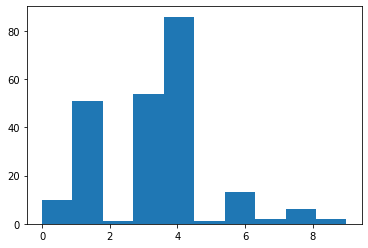

In [145]:
plt.hist(prediction)
plt.show()

In [146]:
#now, let's try 50 cluster centers 

In [147]:
kmeans, prediction, centers = fit_model(50, vector_lst)

In [148]:
prediction

array([ 2, 26, 40,  3,  3, 24,  2, 18, 40,  7,  3, 41, 40,  2,  3, 40, 27,
        3, 40, 30,  2,  3,  6, 23, 10, 40, 42, 13, 40, 28,  2, 40,  3, 40,
       31, 19,  3,  3,  6,  3, 40,  4,  3, 46, 49, 43, 40,  3, 21,  3, 29,
        3, 25, 15,  3, 40,  3, 21, 40,  3,  6, 30, 40,  2,  3,  3, 21, 40,
        2,  3,  3, 29, 32, 49,  2,  2,  2,  3,  3,  3, 44,  2,  3, 49,  3,
       48, 40,  3, 41, 40,  3,  6, 46, 46,  2, 47,  3,  3,  3,  3,  2,  0,
       40,  2, 36, 40, 45,  8,  3,  3, 40, 45,  2, 22, 40,  3, 31,  2,  3,
        9,  2,  3,  3,  3,  2, 40,  3, 46,  2,  2,  3,  2,  2,  3, 14, 44,
        2,  3,  6, 40, 31, 25,  3, 25,  2, 16,  3, 46, 40,  3,  2, 33, 11,
       28,  3, 44,  3, 46, 40,  0,  3,  3, 34,  3, 40, 39, 37, 41,  3, 40,
       40,  3, 40,  2, 40, 44, 41, 40, 40, 46, 41, 40, 20, 40, 12,  3,  5,
       41,  3, 25,  2, 35, 27,  3, 40,  2, 29, 46,  2,  3, 25, 44, 38,  2,
        3,  3,  1, 17,  3, 25, 21,  3,  2, 46,  2,  3,  3, 40, 40,  2, 40,
        2, 21, 31,  2, 46

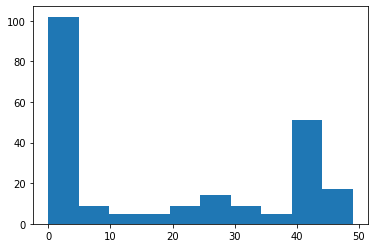

In [149]:
plt.hist(prediction)
plt.show()

In [150]:
#number of data points (SOU address) still varies significantly 
#across clusters. Therefore, we can try to display each cluster,
#by representing it by the most frequently used words in the speeches 
#that belong to the cluster 

In [151]:
def represent_cluster(n, data):
    kmeans, prediction, centers = fit_model(n, data)
    centers = list(centers)
    word_lst = []
    for i in range(len(centers)):
        x = list(centers[i])
        index = x.index(max(x))
        word_lst.append(filetered_lst[index])
    return word_lst

In [152]:
print(represent_cluster(5, vector_lst))
print(represent_cluster(10, vector_lst))
print(represent_cluster(15, vector_lst))

['not', 'billion', 'condition', 'systems', 'cash']
['cash', 'up', 'legislative', 'systems', 'illegal', 'relation', 'billion', 'condition', 'peoples', 'want']
['recommend', 'systems', 'condition', 'cash', 'not', 'collected', 'relation', 'illegal', 'peoples', 'find', 'want', 'effective', 'legislative', 'threatening', 'existed']


In [153]:
'''
Comments:

Although the number of clusters may change, the most commonly used
words tend to carry on as the number of clusters increase. For example,
words such as billion, systems, condition, and cash are acceptable SOU speech words 
that could be commonly used.
'''

'\nComments:\n\nAlthough the number of clusters may change, the most commonly used\nwords tend to carry on as the number of clusters increase. For example,\nwords such as billion, systems, condition, and cash are acceptable SOU speech words \nthat could be commonly used.\n'

In [154]:
# We can also try to see whether similar clusters hold 
# SOU speeches of similar years 

In [158]:
kmeans, prediction, centers = fit_model(5, vector_lst)

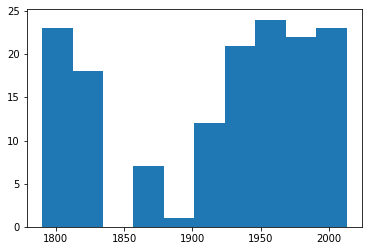

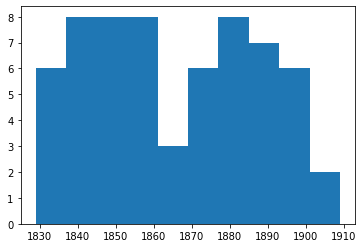

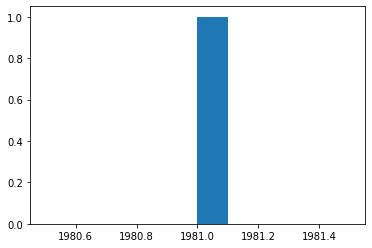

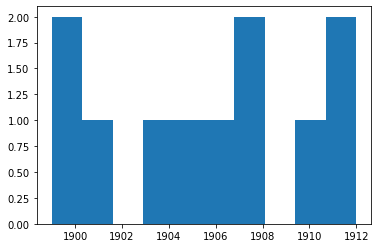

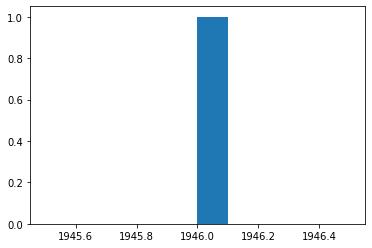

In [163]:
for i in [0,1,2,3,4]:
    prediction_list = []
    for j in range(226):
        if prediction[j] == i:
            prediction_list.append(int((speeches[j]['year'])))
    plt.hist(prediction_list)
    #plt.xticks(np.arange(min(prediction_list), max(prediction_list) + 1, 20))
    plt.show()

In [161]:
'''
We can observe that years are not spread evenly throughout the clusters.
However, we can see that SOUs given in the years close to each 
other tend to have high similarity scores and hence clustered around
each other.
'''

'\nyears are not spread evently throughout the clusters\nSOUs given in the years close to each otehr tend to have \nhigh similarity scores \n'